array([ 1.00000004,  1.00000033,  1.00000256,  1.00001974,  1.00015191,
        1.00116918,  1.0089957 ,  1.06904089,  1.51995227,  4.43281208,
       13.61359496, 20.33022217, 21.76692948, 21.96938887, 21.99575047,
       21.99738974, 21.98382916, 21.87657539, 21.08047983, 16.32131748,
        4.6635998 , -1.6421681 , -2.81483482, -2.97577219, -2.99673699,
       -2.99870933, -2.99316723, -2.94814739, -2.61980624, -0.85419194,
        2.40996896,  3.74253472,  3.96544397,  3.99549417,  3.99943846,
        4.00011325,  4.00144609,  4.01109709,  4.07951303,  4.3993526 ,
        4.83653275,  4.97524037,  4.99671234,  4.99957163,  4.99994432,
        4.99999277,  4.99999906,  4.99999988,  4.99999998,  5.        ])

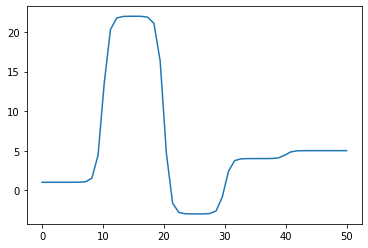

In [103]:
# Fórmula para adicionar R0 às tangentes hiperbólicas.

R0_1 = 1
R0_2 = 22
R0_3 = -3
R0_4 = 4
R0_5 = 5

N = (R0_1+R0_2)/2
M = (R0_3+R0_2)/2
O = (R0_3+R0_4)/2
P = (R0_5+R0_4)/2

A = R0_1 - N
B = R0_2 - M
C = R0_3 - O
D = R0_4 - P

t = np.linspace(0,50,50)
R0 = - A*np.tanh((t - 10)) + N - B*np.tanh((t - 20)) + M - R0_2 - C*np.tanh(t-30) + O - R0_3 - D*np.tanh(t-40) + P - R0_4

plt.plot(t, R0)
R0

In [43]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd
from scipy.integrate import solve_ivp

In [83]:
def grafico(oeste, leste, dados0, dados1, t_pico, list_t, list_R0, R0_1, R0_2, R0_3, R0_4,R0_5, x_esq, x_dir, coef_s, coef_d, t_alt, t_alt2, t_alt3):
    
    meio = int((oeste+leste)/2)
    um_quarto = int((oeste+meio)/2)
    tres_quartos = int((meio+leste)/2)

    dados0_y_rio = dados0[nome_cidade][oeste:leste].to_numpy()/população
    dados0_x_rio = dados0.index[oeste:leste].to_numpy()
    
    if dados_limpos == True:
        dados1_y_rio = dados1[nome_cidade][oeste:leste].to_numpy()/população
        dados1_x_rio = dados1.index[oeste:leste].to_numpy()

    fig, ax = plt.subplots(figsize=(15,8))

    ax.scatter(dados0_x_rio, dados0_y_rio, alpha=1, label='Dados limpos')

    ax.plot(res.t, res.y[1], 'r', label='Infectados SIR')
    ax.axvline(t_pico, color='g',label=f"ΔR0; Dia: {dados0.loc[t_pico]['Datas']}")
    ax.axvline(t_alt, color='b',label=f"ΔR0; Dia: {dados0.loc[t_pico]['Datas']}")
    ax.axvline(t_alt2, color='purple',label=f"ΔR0; Dia: {dados0.loc[t_pico]['Datas']}")
    ax.axvline(t_alt3, color='orange',label=f"ΔR0; Dia: {dados0.loc[t_pico]['Datas']}")

    
    if dados_limpos == True:
        ax.plot(dados1_x_rio, dados1_y_rio,'*-r', alpha=0.3, label='Dados coletados')

    ax.grid(True)
    ax.set_ylabel('Densidade populacional')
    ax.set_xlabel('Dias consecutivos')
    ax.legend(frameon=False, loc='upper left')
    label = [dados0.loc[oeste]['Datas'],dados0.loc[um_quarto]['Datas'],dados0.loc[meio]['Datas'],
              dados0.loc[tres_quartos]['Datas'],dados0.loc[leste]['Datas']]
    ax.set_xticks([oeste,um_quarto,meio,tres_quartos,leste], labels=label)

    ax2 = plt.axes([0.65,0.65,0.2,0.2])
    ax2.scatter(list_t, list_R0, alpha=0.1,label='R0')
    ax2.set_ylabel('R0')
    ax2.set_xlabel('Dias')
    ax2.axvline(t_pico, color='g',label='Pico')
    ax2.set_yticks([R0_2, R0_3, R0_1, R0_4, R0_5])
    ax2.legend(frameon=False)



    label2 = [dados0.loc[x_esq]['Datas'],dados0.loc[t_pico]['Datas'],dados0.loc[x_dir]['Datas']]
    ax2.set_xticks([x_esq,t_pico,x_dir], labels=label2)

    ax2.set_xlim([x_esq,x_dir])
    ax.set_xlim([x_esq,x_dir])
    ax.set_title(f'{nome_cidade}; Modelo SIR modificado; R0_1: {round(R0_1,2)}; R0_2: {round(R0_2,2)}; R0_3: {round(R0_3,2)}')
    
    #plt.savefig('/home/isplay/Área de Trabalho/Dados.pdf')

    return

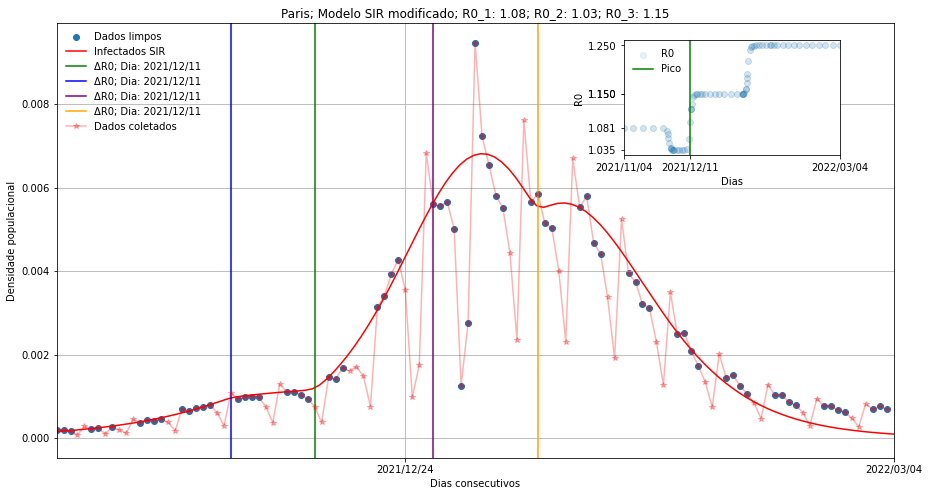

In [85]:
# Paris

# Entrada
url0 = 'https://raw.githubusercontent.com/isplay/projeto_propagacao_epidemias/main/csv_dados_limpos/Paris_casos_limpos.csv'
dados0 = pd.read_csv(url0)
dados_limpos = True
url1 = 'https://raw.githubusercontent.com/isplay/projeto_propagacao_epidemias/main/csv/Paris_casos.csv'
dados1 = pd.read_csv(url1)

# Região
população = 2148271
nome_cidade = 'Paris'

# Intervalo do maior gráfico
oeste = 380
leste = 660

# Intervalo do menor gráfico
x_esq = 540
x_dir = 660


#SIR
def sir(t, y):
    s, i, r = y
        
    R0 = - A*np.tanh(a*(t - t_alt)) + N - B*np.tanh(b*(t - t_pico)) + M - R0_2 - C*np.tanh(c*(t-t_alt2)) + O - R0_3 - D*np.tanh(t-t_alt3) + P - R0_4
    
    dsdt = - R0 * s * i
    didt = R0 * s * i - i
    drdt = i
    
    list_R0.append(R0)
    list_t.append(t)
    
    return dsdt, didt, drdt

# Função R0(t)
R0_1 = 1.081
R0_2 = 1.035
R0_3 = 1.15
R0_4 = 1.15
R0_5 = 1.25

a = 1
b = 1
c = 100
d = 0.1

N = (R0_1+R0_2)/2
M = (R0_2+R0_3)/2
O = (R0_3+R0_4)/2
P = (R0_4+R0_5)/2

A = R0_1 - N
B = R0_2 - M
C = R0_3 - O
D = R0_4 - P

list_R0 = [] 
list_t = []

# Condições iniciais
t0, t = oeste, leste

t_alt =  565
t_pico = 577
t_alt2 = 594
t_alt3 = 609

i0 = 1e-10
r0 = 0
s0 = 1 - i0 - r0

# Simulando o Modelo SIR
resolucao_curva = np.linspace(t0,t,leste-oeste)
res = solve_ivp(sir, (t0, t), y0=[s0, i0, r0], t_eval=resolucao_curva, method='LSODA')

# Plot
grafico(oeste, leste, dados0, dados1, t_pico, list_t, list_R0, R0_1, R0_2, R0_3, R0_4,R0_5, x_esq, x_dir, coef_s, coef_d, t_alt, t_alt2, t_alt3)